In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
import warnings

Let's check how the information given looks like before applying preprocessing to it:

In [43]:
airplanedf = pd.read_csv('../AirplaneDataset/train.csv', index_col=0)
airplanedf.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [44]:
airplanedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

Based on the results, we notice the following:
1. The first two features are useless and will not affect the classification, so we can get rid of them, and even use the "id" column as the index for our dataframe.
2. Many columns contain categorical values but are of type 'object' or 'int64'. Let's replace them with this type.

In [45]:
airplanedf.set_index('id', inplace=True)

In [46]:
airplanedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1

In [47]:
def preprocessing(data, mode):
    categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
    if mode == 'train':
        categorical_indexes = categorical_indexes + [22]
        
    data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')
    return data

airplanedf = preprocessing(airplanedf, 'train')

C:\Users\cyber\AppData\Local\Temp\ipykernel_26468\1174554649.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')


In [48]:
airplanedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding        

In [49]:
print("\nPercentage of NaN at each column in the DataFrame : \n",)
print((airplanedf.isnull().sum() / airplanedf.shape[0]) * 100)


Percentage of NaN at each column in the DataFrame : 

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minute

Description

In [50]:
airplanedf.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [51]:
airplanedf.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179,58879


Correlation Matrix

In [52]:
intdf = pd.DataFrame(airplanedf)
categorical_indexes = [0, 1, 3, 4, 22] + list(range(6, 20))
for i in categorical_indexes:
    intdf.iloc[:, i] = intdf.iloc[:, i].cat.codes
intdf.iloc[:,categorical_indexes] = intdf.iloc[:,categorical_indexes].astype('int')



C:\Users\cyber\AppData\Local\Temp\ipykernel_26468\687701546.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  intdf.iloc[:, i] = intdf.iloc[:, i].cat.codes


In [53]:
corr_mat = intdf.corr()
corr_mat

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.031732,0.008928,0.006909,-0.012870,0.005828,0.008974,0.009142,0.006951,0.000333,...,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.002935,0.000396,0.012211
Customer Type,-0.031732,1.000000,-0.281674,-0.308333,0.042638,-0.225200,-0.007543,-0.206869,-0.019509,0.006078,...,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,0.004036,0.004747,-0.187638
Age,0.008928,-0.281674,1.000000,-0.048524,-0.117370,0.099461,0.017859,0.038125,0.024842,-0.001330,...,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147,0.137167
Type of Travel,0.006909,-0.308333,-0.048524,1.000000,0.487088,-0.267344,-0.105085,0.259763,-0.133511,-0.030700,...,-0.148199,-0.056543,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.005432,-0.005683,-0.449000
Class,-0.012870,0.042638,-0.117370,0.487088,1.000000,-0.427219,-0.023112,0.089922,-0.094329,-0.004488,...,-0.179028,-0.207748,-0.197321,-0.163998,-0.157112,-0.158604,-0.125988,0.010281,0.014701,-0.449321
Flight Distance,0.005828,-0.225200,0.099461,-0.267344,-0.427219,1.000000,0.007131,-0.020043,0.065717,0.004793,...,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426,0.298780
Inflight wifi service,0.008974,-0.007543,0.017859,-0.105085,-0.023112,0.007131,1.000000,0.343845,0.715856,0.336248,...,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095,0.284245
Departure/Arrival time convenient,0.009142,-0.206869,0.038125,0.259763,0.089922,-0.020043,0.343845,1.000000,0.436961,0.444757,...,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864,-0.051601
Ease of Online booking,0.006951,-0.019509,0.024842,-0.133511,-0.094329,0.065717,0.715856,0.436961,1.000000,0.458655,...,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984,0.171705
Gate location,0.000333,0.006078,-0.001330,-0.030700,-0.004488,0.004793,0.336248,0.444757,0.458655,1.000000,...,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143,0.000682


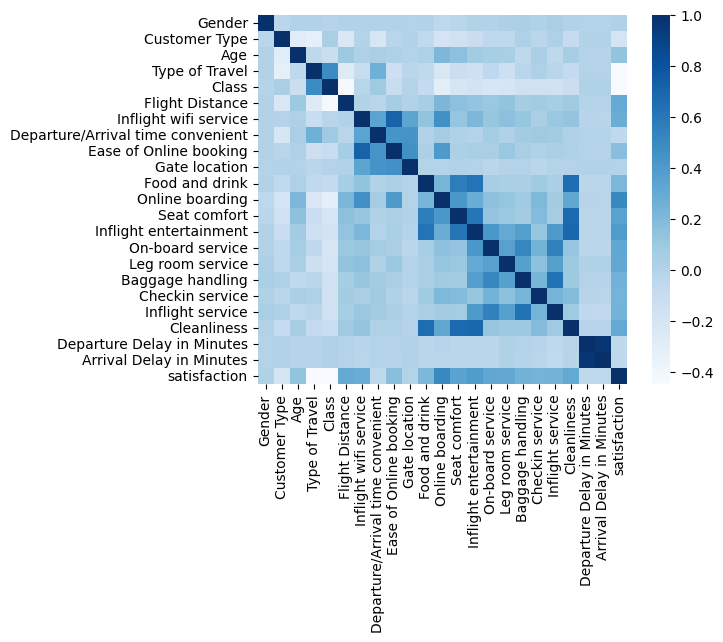

In [54]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

Probability Density Functions for every numeric column

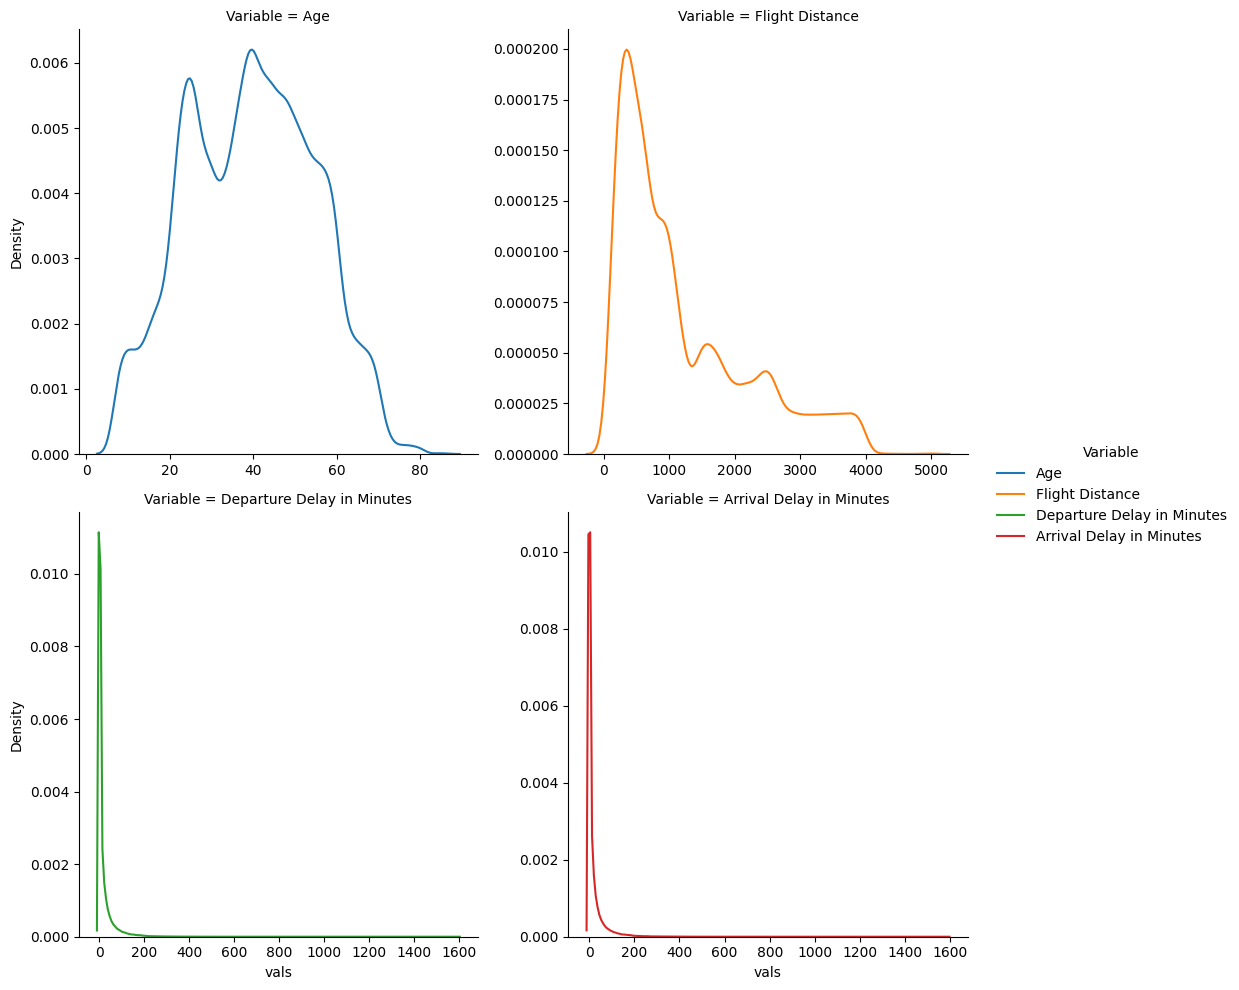

In [55]:
df = airplanedf.select_dtypes(['int', 'float'])

df = df.melt(var_name='Variable',  value_name='vals')

sns.displot(kind='kde', data=df, col='Variable', col_wrap=2, x='vals', hue="Variable", facet_kws={'sharey': False, 'sharex': False})

Histogram for every categorical column

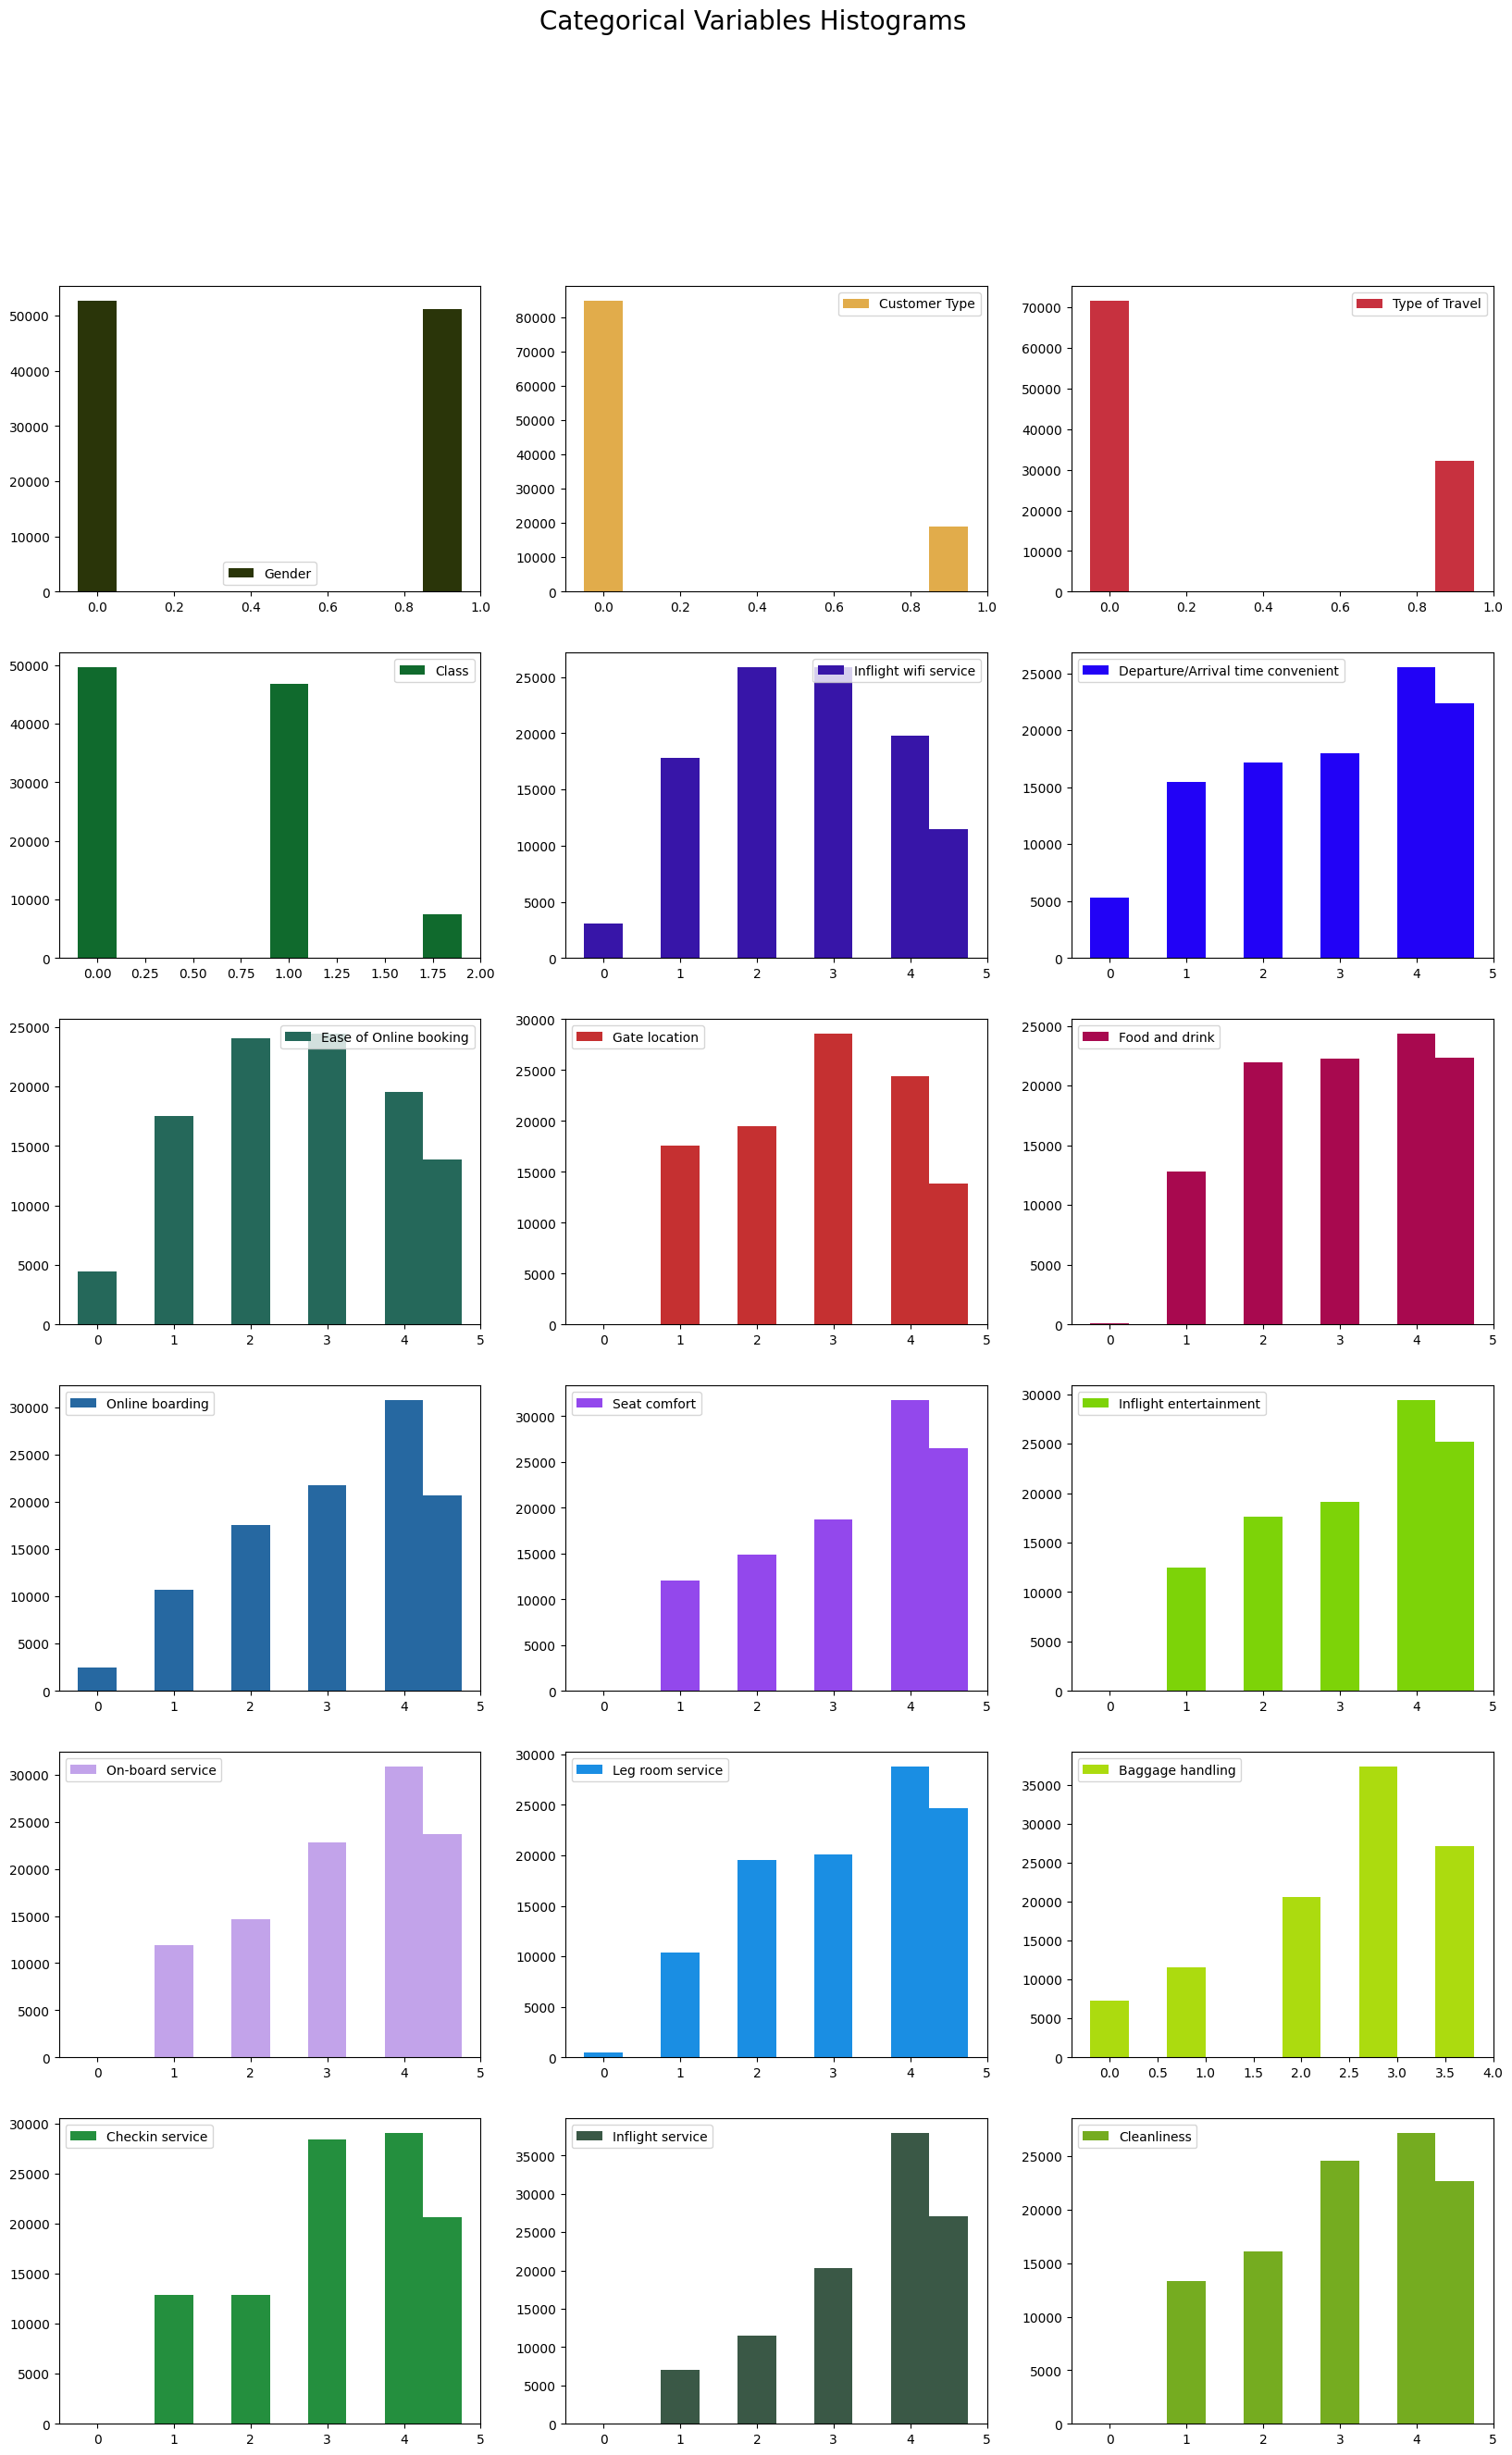

In [56]:
import random

df2 = airplanedf.select_dtypes(exclude=['int', 'float']).iloc[:, :-1]

number_of_colors = df2.shape[1]

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (20, 30))

for index, column in enumerate(df2.columns):
    ax = axes.flatten()[index]
    ax.hist(df2[column], color = colors[index], label = column, align='left')
    ax.legend(loc = "best")
plt.suptitle("Categorical Variables Histograms", size = 20)
plt.show()

## df2.hist(bins=10, figsize=(25, 20), grid=False, color=colors)

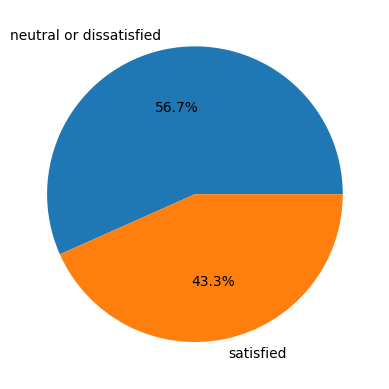

In [57]:
labels = airplanedf.satisfaction.cat.categories
ratio = airplanedf.satisfaction.value_counts(normalize=True) * 100

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()
